<a href="https://colab.research.google.com/github/AhnafZahin/NITT_Chatbot/blob/main/Tokenizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving DataSet.json to DataSet.json


In [2]:
import json

# Assume the file name is 'dataset.json'
with open('DataSet.json', 'r') as file:
    data = json.load(file)

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

patterns = []
responses = []
tags = []
for intent in data:
    for pattern in intent['patterns']:
        patterns.append(pattern)
        responses.append(intent['responses'][0])  # Assuming you will take the first response as the desired response
        tags.append(intent['tag'])

# Tokenize the patterns
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(patterns)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(patterns)
padded_sequences = pad_sequences(sequences, padding='post')

# Convert tags to numerical values
unique_tags = list(set(tags))
tag_index = {tag: i for i, tag in enumerate(unique_tags)}
numerical_tags = [tag_index[tag] for tag in tags]

In [ ]:
import pandas as pd

# Convert the word index dictionary to a pandas DataFrame and display it
word_index_df = pd.DataFrame(list(word_index.items()), columns=['Word', 'Index'])
print(word_index_df.head())  # Show the first few rows

    Word  Index
0  <OOV>      1
1    the      2
2     is      3
3    are      4
4      a      5


In [ ]:
# Display original text alongside tokenized and padded sequences
for i in range(5):  # Show the first 5 examples
    print(f'Original Text: {patterns[i]}')
    print(f'Tokenized Sequence: {sequences[i]}')
    print(f'Padded Sequence: {padded_sequences[i]}')
    print('\n')  # Print a newline to separate examples

Original Text: Where is the university located?
Tokenized Sequence: [14, 3, 2, 31, 124]
Padded Sequence: [ 14   3   2  31 124   0   0   0   0   0]


Original Text: Can you provide the location of the university?
Tokenized Sequence: [10, 17, 125, 2, 156, 25, 2, 31]
Padded Sequence: [ 10  17 125   2 156  25   2  31   0   0]


Original Text: What's the address of the university?
Tokenized Sequence: [38, 2, 236, 25, 2, 31]
Padded Sequence: [ 38   2 236  25   2  31   0   0   0   0]


Original Text: How can I contact the admissions office?
Tokenized Sequence: [7, 10, 6, 39, 2, 63, 44]
Padded Sequence: [ 7 10  6 39  2 63 44  0  0  0]


Original Text: What is the contact information for admissions?
Tokenized Sequence: [11, 3, 2, 39, 99, 9, 63]
Padded Sequence: [11  3  2 39 99  9 63  0  0  0]




In [ ]:
# Convert the tag index dictionary to a pandas DataFrame and display it
tag_index_df = pd.DataFrame(list(tag_index.items()), columns=['Tag', 'Index'])
print(tag_index_df)


                       Tag  Index
0                dormitory      0
1                transport      1
2        general_inquiries      2
3                placement      3
4               counseling      4
5                emergency      5
6                  parking      6
7                 vacation      7
8   international_students      8
9        negative_feedback      9
10        library_services     10
11           campus_safety     11
12                 housing     12
13            student_life     13
14                   swear     14
15             transcripts     15
16         health_services     16
17          transportation     17
18                 library     18
19                    food     19
20              salutation     20
21                farewell     21
22       positive_feedback     22
23              admissions     23
24                     hod     24
25                 ragging     25
26                 faculty     26
27         extracurricular     27
28            

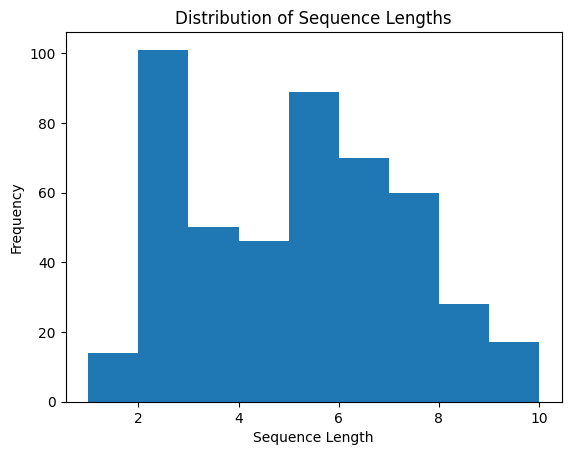

In [ ]:
import matplotlib.pyplot as plt

# Get the length of each sequence
sequence_lengths = [len(seq) for seq in sequences]

# Plot a histogram of sequence lengths
plt.hist(sequence_lengths, bins=range(min(sequence_lengths), max(sequence_lengths) + 1))
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()
